# INFO - 6105 Data Science Engineering Methods and Tools
###                        Blue Bikes Demand Forecasting & EDA
### Team - 2 (Rutuja More, Nitant Jatale )

# IMPORT LIBARARIES

In [1]:
# Importing Pandas
import pandas as pd

# Imported Calender to check for holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

from functools import reduce

# Importing Sklearn libraries to work on ML Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing r2_score library to check model accuracy
from sklearn.metrics import r2_score

# Importing library to do Data Profiling
import ydata_profiling
from pandas_profiling import ProfileReport

# Importing matplotlib to plot graphs
import matplotlib.pyplot as plt
%matplotlib inline

# Other Common Libraries
import numpy as np
import seaborn as sns
import datetime as dt
import pickle

# Library to plot Maps
import folium

C:\Users\nitan\AppData\Local\Temp\ipykernel_20120\3675348958.py:25: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Load Data

##### Load AQI Data

In [2]:
df_aqi2019 = pd.read_csv(r'C:/Users/nitan/OneDrive/Desktop/NEU/2nd/Data Science/Project/Data/AQI/aqi2019.csv',index_col=False)
df_aqi2020 = pd.read_csv(r'C:/Users/nitan/OneDrive/Desktop/NEU/2nd/Data Science/Project/Data/AQI/aqi2020.csv',index_col=False)
df_aqi2021 = pd.read_csv(r'C:/Users/nitan/OneDrive/Desktop/NEU/2nd/Data Science/Project/Data/AQI/aqi2021.csv',index_col=False)
df_aqi2022 = pd.read_csv(r'C:/Users/nitan/OneDrive/Desktop/NEU/2nd/Data Science/Project/Data/AQI/aqi2022.csv',index_col=False)

df_aqi = pd.concat([df_aqi2019,df_aqi2020,df_aqi2021,df_aqi2022])
df_aqi

df_aqi2019 = 0
df_aqi2020 = 0
df_aqi2021 = 0
df_aqi2022 = 0

##### Load Covid Data

In [3]:
df_covid = pd.read_csv("C:/Users/nitan/OneDrive/Desktop/NEU/2nd/Data Science/Project/Data/Covid/covid.csv")
df_covid.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-03-24,2023-03-25,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19812,19812,19812,19812,19812,19812,19836,19836,19836,19836
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70040,70040,70040,70040,70040,70040,70159,70159,70159,70159
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7509,7509,7509,7509,7509,7509,7512,7512,7512,7512
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8105,8105,8105,8105,8105,8105,8113,8113,8113,8113


##### Load Weather Data

In [4]:
df_weather = pd.read_csv(r'C:/Users/nitan/OneDrive/Desktop/NEU/2nd/Data Science/Project/Data/Weather/Weather.csv',index_col=False)
df_weather

,STATION,NAME,DATE,AWND,PRCP,SNOW,TMAX,TMIN
0,US1MASF0002,"WINTHROP 0.2 N, MA US",1/1/2016,NaN,0.00,0.0,NaN,NaN
1,US1MASF0002,"WINTHROP 0.2 N, MA US",1/2/2016,NaN,0.00,0.0,NaN,NaN
2,US1MASF0002,"WINTHROP 0.2 N, MA US",1/3/2016,NaN,0.00,0.0,NaN,NaN
3,US1MASF0002,"WINTHROP 0.2 N, MA US",1/4/2016,NaN,0.00,0.0,NaN,NaN
4,US1MASF0002,"WINTHROP 0.2 N, MA US",1/5/2016,NaN,0.00,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
10482,US1MASF0030,"CHARLESTOWN 0.4 SSE, MA US",9/21/2021,NaN,0.00,0.0,NaN,NaN
10483,US1MASF0030,"CHARLESTOWN 0.4 SSE, MA US",9/22/2021,NaN,0.00,0.0,NaN,NaN
10484,US1MASF0030,"CHARLESTOWN 0.4 SSE, MA US",9/23/2021,NaN,0.01,NaN,NaN,NaN
10485,US1MASF0030,"CHARLESTOWN 0.4 SSE, MA US",9/24/2021,NaN,0.05,NaN,NaN,NaN


##### Load BlueBike Data

In [5]:
df_trip2019 = pd.read_csv(r'D:\DS\BlueBike\trip2019.csv',index_col=False)
df_trip2020 = pd.read_csv(r'D:\DS\BlueBike\trip2020.csv',index_col=False)
df_trip2021 = pd.read_csv(r'D:\DS\BlueBike\trip2021.csv',index_col=False)
df_trip2022 = pd.read_csv(r'D:\DS\BlueBike\trip2022.csv',index_col=False)

df_trip = pd.concat([df_trip2019,df_trip2020,df_trip2021,df_trip2022])
df_trip

df_trip2019 = 0
df_trip2020 = 0
df_trip2021 = 0
df_trip2022 = 0

C:\Users\nitan\AppData\Local\Temp\ipykernel_20120\87664226.py:1: DtypeWarning: Columns (0,3,5,6,7,9,10,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trip2019 = pd.read_csv(r'D:\DS\BlueBike\trip2019.csv',index_col=False)
C:\Users\nitan\AppData\Local\Temp\ipykernel_20120\87664226.py:2: DtypeWarning: Columns (0,3,5,6,7,9,10,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trip2020 = pd.read_csv(r'D:\DS\BlueBike\trip2020.csv',index_col=False)
C:\Users\nitan\AppData\Local\Temp\ipykernel_20120\87664226.py:3: DtypeWarning: Columns (0,3,5,6,7,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trip2021 = pd.read_csv(r'D:\DS\BlueBike\trip2021.csv',index_col=False)
C:\Users\nitan\AppData\Local\Temp\ipykernel_20120\87664226.py:4: DtypeWarning: Columns (0,3,5,6,7,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trip2022 = pd.read_csv(r'D:\DS\

## Data Preprocessing

### Transform Data

##### Transform AQI Data

In [6]:
df_aqi['Date']= pd.to_datetime(df_aqi['Date'],format='%m/%d/%Y') #Converting Object to Datetime Format

In [7]:
#Group by Date and Sort
df_aqi = df_aqi.groupby(['Date']).mean()  
df_aqi = df_aqi.sort_values(by=['Date'])

In [8]:
#Renaming Columns
df_aqi = df_aqi.rename(columns = { 'Daily Max 1-hour NO2 Concentration':'NO2 Concentration', 'DAILY_AQI_VALUE':'AQI'})

#Column DataType Change
df_aqi[['AQI']] = df_aqi[['AQI']].astype(int)
df_aqi[['NO2 Concentration']] = df_aqi[['NO2 Concentration']].round(2)

#Reindexing Columns
df_aqi = df_aqi.reindex(columns = ['NO2 Concentration', 'AQI'])

#Reseting Index
df_aqi = df_aqi.reset_index()

In [9]:
# Check if Date is weekend
df_aqi["IsWeekend"] = df_aqi["Date"].dt.weekday >= 5

# Check if date is Holiday
cal = calendar()
dr = pd.date_range(start='2019-01-01', end='2022-12-31')
holidays = cal.holidays(start=dr.min(), end=dr.max())

df_aqi['Holiday'] = df_aqi['Date'].isin(holidays)

# Replace boolean with Integer
df_aqi.replace({False: 0, True: 1}, inplace=True)

In [10]:
df_aqi

,Date,NO2 Concentration,AQI,IsWeekend,Holiday
0,2019-01-01,8.49,7,0,1
1,2019-01-02,28.60,27,0,0
2,2019-01-03,23.90,22,0,0
3,2019-01-04,24.73,23,0,0
4,2019-01-05,23.46,22,1,0
...,...,...,...,...,...
1456,2022-12-27,26.33,24,0,0
1457,2022-12-28,29.31,27,0,0
1458,2022-12-29,30.70,28,0,0
1459,2022-12-30,29.10,27,0,0


##### Transform Covid Data

In [11]:
#Filtering Boston Covid data
df_covid.drop(columns =['State','StateFIPS'], inplace = True)
Boston_df = df_covid.loc[(df_covid['countyFIPS'] == 25025) | (df_covid['countyFIPS'] == 25017) | (df_covid['countyFIPS'] == 25021)]


In [12]:
#Drop unwanted columns
Boston_df.drop(columns =['countyFIPS','County Name'], inplace = True)

C:\Users\nitan\AppData\Local\Temp\ipykernel_20120\3471716583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boston_df.drop(columns =['countyFIPS','County Name'], inplace = True)


In [13]:
# Total values of all counties 
Boston_df = Boston_df.sum()

# Value for each day
Boston_df =  Boston_df.diff()

In [14]:
#Converting series to df
df_Boston = Boston_df.to_frame()

#reseting index
df_Boston['index'] = df_Boston.index
df_Boston.reset_index(drop = True)
df_Boston = df_Boston.reset_index(drop=True)

# Rename the columns to 'DailyCases' and 'Date'
df_Boston.rename(columns={df_Boston.columns[0]: 'DailyCases', df_Boston.columns[1]: 'Date'},inplace=True)

# Reorder the columns so that Date comes first
df_Boston = df_Boston[['Date','DailyCases']]

# Convert to datetime format 
df_Boston['Date'] = pd.to_datetime(df_Boston['Date'])


In [15]:
# Replace missing or infinite values with nulls
df_Boston['DailyCases'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values with -1
df_Boston['DailyCases'] = pd.to_numeric(df_Boston['DailyCases'], errors='coerce').fillna(-1).astype(int)


In [16]:
#Add values for the year 2019

start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2020-01-21')
new_dates = pd.date_range(start=start_date, end=end_date)

for date in new_dates:
    df_Boston = df_Boston.append({'Date': date, 'DailyCases': 0}, ignore_index=True)

# sort the dataframe by date
df_Boston = df_Boston.sort_values('Date').reset_index(drop=True)

df_covid = df_Boston

df_covid

C:\Users\nitan\AppData\Local\Temp\ipykernel_20120\344403778.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Boston = df_Boston.append({'Date': date, 'DailyCases': 0}, ignore_index=True)
C:\Users\nitan\AppData\Local\Temp\ipykernel_20120\344403778.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Boston = df_Boston.append({'Date': date, 'DailyCases': 0}, ignore_index=True)
C:\Users\nitan\AppData\Local\Temp\ipykernel_20120\344403778.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Boston = df_Boston.append({'Date': date, 'DailyCases': 0}, ignore_index=True)
C:\Users\nitan\AppData\Local\Temp\ipykernel_20120\344403778.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in 

,Date,DailyCases
0,2019-01-01,0
1,2019-01-02,0
2,2019-01-03,0
3,2019-01-04,0
4,2019-01-05,0
...,...,...
1548,2023-03-29,907
1549,2023-03-30,0
1550,2023-03-31,0
1551,2023-04-01,0


##### Transform Weather Data

In [17]:
#Converting Date Object to Datetime Format
df_weather['DATE']= pd.to_datetime(df_weather['DATE'],format='%m/%d/%Y') 

In [18]:
# Filtering Boston Weather Records
df_weather = df_weather[df_weather['STATION'] == 'USW00014739']
df_weather = df_weather.loc[(df_weather['DATE'] >= '2019-01-01') & (df_weather['DATE'] < '2022-12-31')]

#Droping unwanted Columns
df_weather = df_weather.drop(df_weather.iloc[:, 0:2],axis = 1)

In [19]:
#Rename Date Column
df_weather = df_weather.rename(columns = { 'DATE':'Date'})

In [20]:
df_weather

,Date,AWND,PRCP,SNOW,TMAX,TMIN
5862,2019-01-01,15.88,0.38,0.0,59.0,34.0
5863,2019-01-02,9.40,0.00,0.0,37.0,28.0
5864,2019-01-03,10.51,0.02,0.0,46.0,32.0
5865,2019-01-04,11.18,0.00,0.0,48.0,34.0
5866,2019-01-05,9.17,0.53,0.0,43.0,38.0
...,...,...,...,...,...,...
7317,2022-12-26,11.41,0.00,0.0,34.0,21.0
7318,2022-12-27,10.07,0.00,0.0,36.0,28.0
7319,2022-12-28,8.50,0.00,0.0,43.0,24.0
7320,2022-12-29,7.61,0.00,0.0,54.0,32.0


##### Transform BlueBikeData

In [21]:
# Convert Datetime to Date
df_trip['starttime'] = pd.to_datetime(df_trip['starttime'], errors = 'coerce').dt.date
df_trip['stoptime'] = pd.to_datetime(df_trip['stoptime'], errors = 'coerce').dt.date

# Drop Unwanted Columns
df_trip = df_trip.drop(['tripduration','bikeid', 'usertype','birth year','gender'], axis = 1) 

In [22]:
#Rename Date Column
df_trip = df_trip.rename(columns = { 'starttime':'Date'})

df_trip['Date'] = pd.to_datetime(df_trip['Date'], errors = 'coerce')

#### Delete Duplicate Data

In [23]:
# Creating a copy of original dataframe for duplicate check
bike_dup = df_trip

# Checking for duplicates 
bike_dup.drop_duplicates(subset=None, inplace=True)

In [24]:
df_trip

,Date,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,postal code
0,2019-01-01,2019-01-01,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,NaN
1,2019-01-01,2019-01-01,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,NaN
2,2019-01-01,2019-01-01,68,Central Square at Mass Ave / Essex St,42.36507,-71.1031,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,NaN
3,2019-01-01,2019-01-01,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.39121,-71.122608,NaN
4,2019-01-01,2019-01-01,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3757287,2022-12-31,2023-01-01,186,Congress St at Northern Ave,42.3481,-71.03764,136,ID Building West,42.344796,-71.031614,06360
3757288,2022-12-31,2022-12-31,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,417,Columbus Ave at W. Canton St,42.344742,-71.076482,02130
3757289,2022-12-31,2023-01-01,49,Stuart St at Charles St,42.351146,-71.066289,16,Back Bay T Stop - Dartmouth St at Stuart St,42.348074,-71.07657,02141
3757290,2022-12-31,2023-01-01,39,Washington St at Rutland St,42.338515,-71.074041,43,Rowes Wharf at Atlantic Ave,42.357143,-71.050699,02116


###### Create df_grouped_count

In [25]:
df_trip_group = df_trip.groupby(['Date','start station name']).size().reset_index(name='BikeUndocked') 
df_trip_group

,Date,start station name,BikeUndocked
0,2019-01-01,175 N Harvard St,5
1,2019-01-01,191 Beacon St,2
2,2019-01-01,30 Dane St.,3
3,2019-01-01,359 Broadway - Broadway at Fayette Street,7
4,2019-01-01,699 Mt Auburn St,1
...,...,...,...
449224,2022-12-31,Watertown Sq,1
449225,2022-12-31,Watertown Town Hall,1
449226,2022-12-31,Wentworth Institute of Technology - Huntington...,3
449227,2022-12-31,Williams St at Washington St,7


### Joining DataFrames

###### Joining Trip Data

In [26]:
# compiling the list of dataframes you want to merge
df_trip = pd.merge(pd.merge(pd.merge(df_trip,df_aqi,on='Date'),df_covid,on='Date'),df_weather,on='Date')

In [27]:
df_trip

,Date,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,NO2 Concentration,AQI,IsWeekend,Holiday,DailyCases,AWND,PRCP,SNOW,TMAX,TMIN
0,2019-01-01,2019-01-01,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,...,8.49,7,0,1,0,15.88,0.38,0.0,59.0,34.0
1,2019-01-01,2019-01-01,117,Binney St / Sixth St,42.366162,-71.086883,189,Kendall T,42.362428,-71.084955,...,8.49,7,0,1,0,15.88,0.38,0.0,59.0,34.0
2,2019-01-01,2019-01-01,68,Central Square at Mass Ave / Essex St,42.36507,-71.1031,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,...,8.49,7,0,1,0,15.88,0.38,0.0,59.0,34.0
3,2019-01-01,2019-01-01,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,334,Mass Ave at Hadley/Walden,42.39121,-71.122608,...,8.49,7,0,1,0,15.88,0.38,0.0,59.0,34.0
4,2019-01-01,2019-01-01,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,367,Vassal Lane at Tobin/VLUS,42.383932,-71.139613,...,8.49,7,0,1,0,15.88,0.38,0.0,59.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584706,2022-12-30,2022-12-31,178,MIT Pacific St at Purrington St,42.359573,-71.101295,471,MIT Carleton St at Amherst St,42.360542,-71.086698,...,29.10,27,0,0,0,8.72,0.00,0.0,63.0,39.0
8584707,2022-12-30,2022-12-31,185,Third at Binney,42.365445,-71.082771,471,MIT Carleton St at Amherst St,42.360542,-71.086698,...,29.10,27,0,0,0,8.72,0.00,0.0,63.0,39.0
8584708,2022-12-30,2022-12-31,47,Cross St at Hanover St,42.362811,-71.056067,374,Tremont St at Hamilton Pl,42.356683,-71.061666,...,29.10,27,0,0,0,8.72,0.00,0.0,63.0,39.0
8584709,2022-12-30,2022-12-31,4,Tremont St at E Berkeley St,42.345392,-71.069616,44,Congress St at Boston City Hall,42.360418,-71.057522,...,29.10,27,0,0,0,8.72,0.00,0.0,63.0,39.0


###### Joinig Grouped Trip Data

In [28]:
df_trip_group = pd.merge(pd.merge(pd.merge(df_trip_group,df_aqi,on='Date'),df_covid,on='Date'),df_weather,on='Date')

In [29]:
df_trip_group

,Date,start station name,BikeUndocked,NO2 Concentration,AQI,IsWeekend,Holiday,DailyCases,AWND,PRCP,SNOW,TMAX,TMIN
0,2019-01-01,175 N Harvard St,5,8.49,7,0,1,0,15.88,0.38,0.0,59.0,34.0
1,2019-01-01,191 Beacon St,2,8.49,7,0,1,0,15.88,0.38,0.0,59.0,34.0
2,2019-01-01,30 Dane St.,3,8.49,7,0,1,0,15.88,0.38,0.0,59.0,34.0
3,2019-01-01,359 Broadway - Broadway at Fayette Street,7,8.49,7,0,1,0,15.88,0.38,0.0,59.0,34.0
4,2019-01-01,699 Mt Auburn St,1,8.49,7,0,1,0,15.88,0.38,0.0,59.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448916,2022-12-30,Wentworth Institute of Technology - Huntington...,7,29.10,27,0,0,0,8.72,0.00,0.0,63.0,39.0
448917,2022-12-30,West End Park,6,29.10,27,0,0,0,8.72,0.00,0.0,63.0,39.0
448918,2022-12-30,Whittier St Health Center,1,29.10,27,0,0,0,8.72,0.00,0.0,63.0,39.0
448919,2022-12-30,Williams St at Washington St,10,29.10,27,0,0,0,8.72,0.00,0.0,63.0,39.0


# EDA

In [30]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8584711 entries, 0 to 8584710
Data columns (total 21 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Date                     datetime64[ns]
 1   stoptime                 object        
 2   start station id         object        
 3   start station name       object        
 4   start station latitude   object        
 5   start station longitude  object        
 6   end station id           object        
 7   end station name         object        
 8   end station latitude     object        
 9   end station longitude    object        
 10  postal code              object        
 11  NO2 Concentration        float64       
 12  AQI                      int32         
 13  IsWeekend                int64         
 14  Holiday                  int64         
 15  DailyCases               int64         
 16  AWND                     float64       
 17  PRCP                     fl

In [31]:
df_trip.describe()

,NO2 Concentration,AQI,IsWeekend,Holiday,DailyCases,AWND,PRCP,SNOW,TMAX,TMIN
count,8.584711e+06,8.584711e+06,8.584711e+06,8.584711e+06,8.584711e+06,8.584711e+06,8.584711e+06,8.584711e+06,8.584711e+06,8.584711e+06
mean,1.487685e+01,1.353825e+01,2.745746e-01,2.288918e-02,4.877965e+02,1.043356e+01,8.653354e-02,1.935747e-02,6.873761e+01,5.308901e+01
std,6.324445e+00,5.968796e+00,4.462997e-01,1.495502e-01,1.236537e+03,3.295582e+00,2.502947e-01,3.543452e-01,1.568040e+01,1.435937e+01
min,3.160000e+00,3.000000e+00,0.000000e+00,0.000000e+00,-2.892000e+03,1.570000e+00,0.000000e+00,0.000000e+00,1.000000e+01,4.000000e+00
25%,1.042000e+01,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.050000e+00,0.000000e+00,0.000000e+00,5.800000e+01,4.300000e+01
50%,1.372000e+01,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.840000e+00,0.000000e+00,0.000000e+00,7.100000e+01,5.600000e+01
75%,1.813000e+01,1.700000e+01,1.000000e+00,0.000000e+00,5.210000e+02,1.230000e+01,2.000000e-02,0.000000e+00,8.000000e+01,6.500000e+01
max,4.721000e+01,4.400000e+01,1.000000e+00,1.000000e+00,2.753600e+04,2.908000e+01,2.540000e+00,2.360000e+01,1.000000e+02,8.300000e+01


#### Total number of bike stations : Start Station & End Station

In [32]:
unstn1 = pd.DataFrame(df_trip['start station name'].unique())
unstn2 = pd.DataFrame(df_trip['end station name'].unique())
unstn1.columns = ['Date']
unstn2.columns = ['endstation']
print("Total Number of Bike Stations are :" , len(unstn1),",",len(unstn2))

Total Number of Bike Stations are : 509 , 510


#### Yearwise Trip Count

D:\Softwares\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<module 'matplotlib.pyplot' from 'D:\\Softwares\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

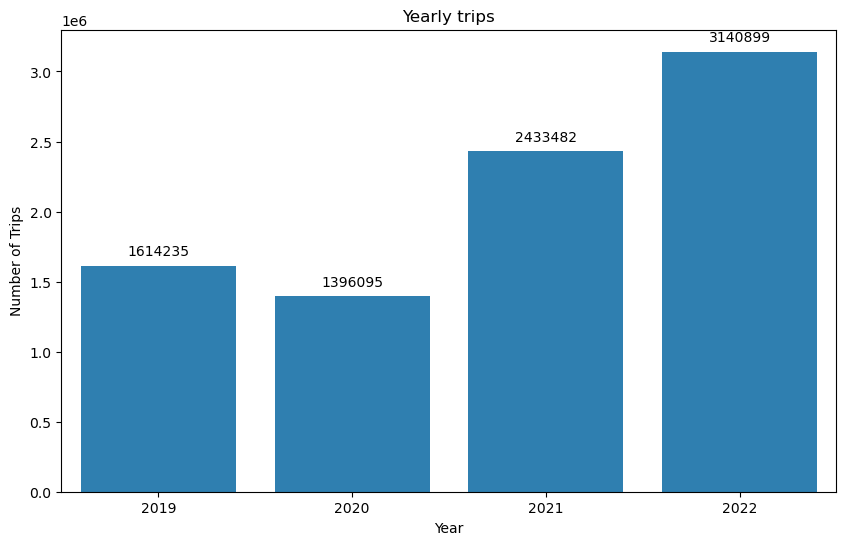

In [33]:
# Plotting the number of trips per Year
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(df_trip['Date'].dt.year, color='#1984c5')
plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.title('Yearly trips')

# Display total values
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt

#### Number of Trips Each Month

D:\Softwares\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<module 'matplotlib.pyplot' from 'D:\\Softwares\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

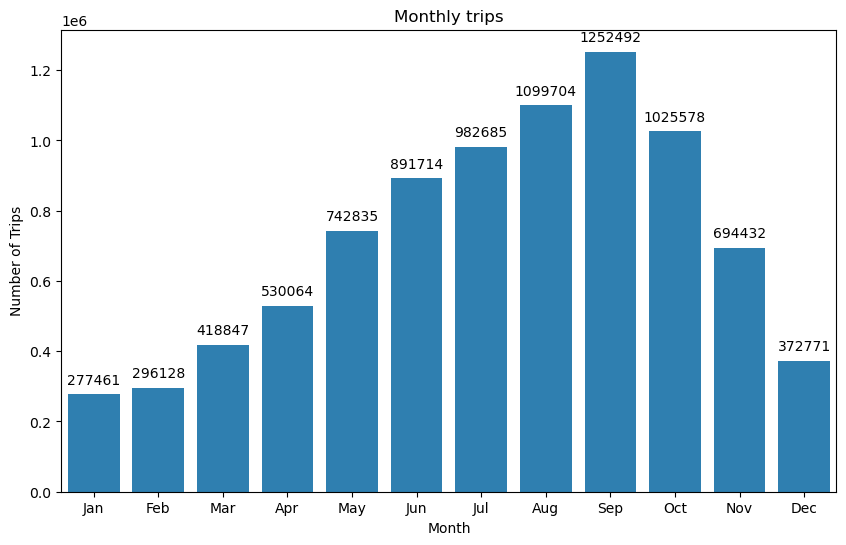

In [34]:
# Plotting the number of trips per month
fig = plt.figure(figsize = (10,6))
ax = sns.countplot(df_trip['Date'].dt.month, color='#1984c5')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(12), months)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Monthly trips')

# Display total values 
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt

#### Monthly Tripcount Comparison for all years

<module 'matplotlib.pyplot' from 'D:\\Softwares\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

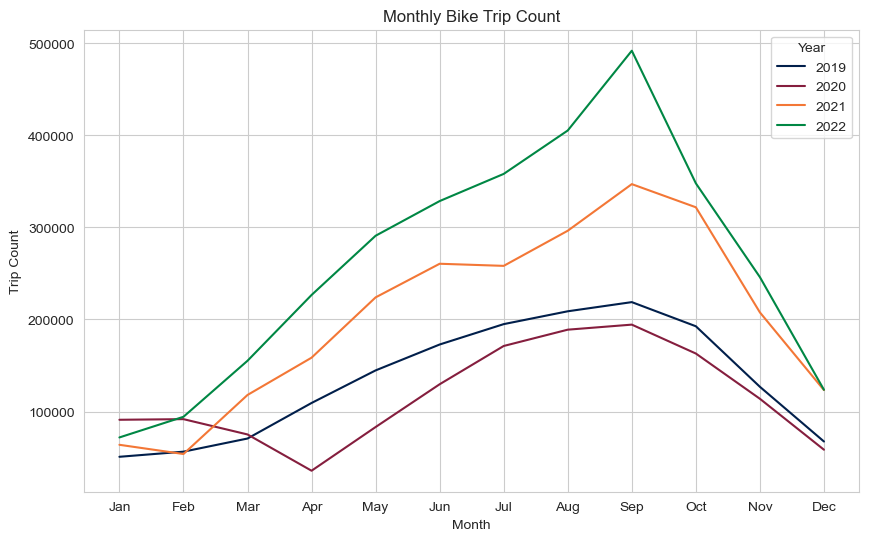

In [35]:
df_trip_group['Year'] = df_trip_group['Date'].dt.year
df_trip_group['Month'] = df_trip_group['Date'].dt.month
bike_trips_monthly = df_trip_group.groupby(['Year', 'Month'])['BikeUndocked'].sum().reset_index()

# Creating a line plot Month,Trip Count
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='BikeUndocked', hue='Year', data=bike_trips_monthly, palette=['#011f4b','#851e3e','#f37736', '#008744'])
plt.xlabel('Month')
plt.ylabel('Trip Count')
plt.title('Monthly Bike Trip Count')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1,13), months)

plt

#### Covid vs Trip data

<module 'matplotlib.pyplot' from 'D:\\Softwares\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

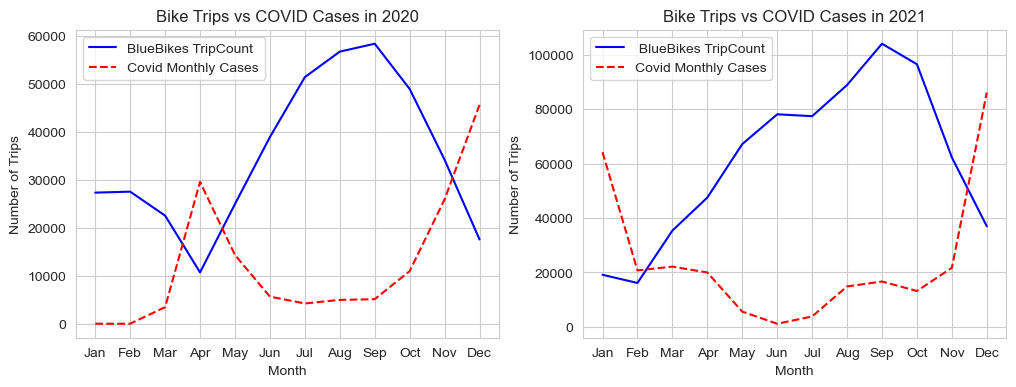

In [36]:
# Filtering COVID cases data for years 2020 and 2021
covid_data_2020 = df_covid[df_covid['Date'].dt.year == 2020]
covid_data_2021 = df_covid[df_covid['Date'].dt.year == 2021]

# Filtering bike trips data for years 2020 and 2021
bike_trips_2020 = df_trip[df_trip['Date'].dt.year == 2020]
bike_trips_2021 = df_trip[df_trip['Date'].dt.year == 2021]

# Grouping COVID cases data by month and sum the daily cases for each group
covid_monthly_sum_2020 = covid_data_2020.groupby(covid_data_2020['Date'].dt.month)['DailyCases'].sum().reset_index()
covid_monthly_sum_2021 = covid_data_2021.groupby(covid_data_2021['Date'].dt.month)['DailyCases'].sum().reset_index()

bike_trips_sum_2020 = bike_trips_2020.groupby(bike_trips_2020['Date'].dt.month)['start station id'].count().reset_index()
bike_trips_sum_2021 = bike_trips_2021.groupby(bike_trips_2021['Date'].dt.month)['start station id'].count().reset_index()

# Creating subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# Plot bar chart for bike trips in 2020 
ax1.plot(bike_trips_sum_2020['Date'], 0.3 * bike_trips_sum_2020['start station id'], color='b')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Trips')
ax1.set_title('Bike Trips vs COVID Cases in 2020')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.set_xticks(range(1, 13), months)


# Plotting line chart for COVID cases in 2020 
ax1.plot(covid_monthly_sum_2020['Date'], covid_monthly_sum_2020['DailyCases'], 'r--')
ax1.legend(['BlueBikes TripCount', 'Covid Monthly Cases'])

# Plotting bar chart for bike trips in 2021
ax2.plot(bike_trips_sum_2021['Date'], 0.3 * bike_trips_sum_2021['start station id'], color='b')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Trips')
ax2.set_title('Bike Trips vs COVID Cases in 2021')
ax2.set_xticks(range(1, 13),months)
 
# Plotting line chart for COVID cases in 2020 
ax2.plot(covid_monthly_sum_2021['Date'], covid_monthly_sum_2021['DailyCases'], 'r--')
ax2.legend([' BlueBikes TripCount', 'Covid Monthly Cases'])


plt

##### Top 50 most busy start stations trip count

<module 'matplotlib.pyplot' from 'D:\\Softwares\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

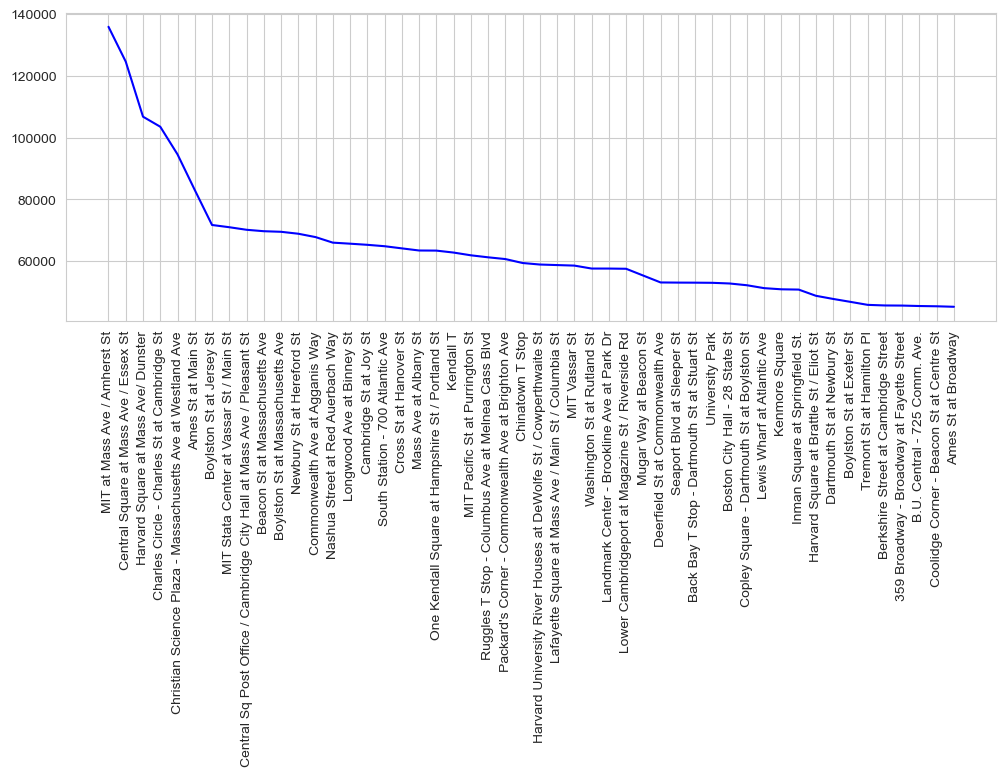

In [37]:
df_busy_stations = pd.DataFrame(df_trip_group.groupby(['start station name'])['BikeUndocked'].agg(['sum']).reset_index())
df_busy_stations = df_busy_stations.sort_values(by=['sum'], ascending=False)

# Set the figure size and y-axis interval
fig, ax = plt.subplots(figsize=(12, 4))

# Plotting the Graph
ax.plot(df_busy_stations.head(50)['start station name'], df_busy_stations.head(50)['sum'], color='b')

plt.xticks(rotation =90)

plt

##### Top 20 most busy  start stations

In [38]:
df_busy_stations = df_trip_group.groupby(['start station name'])['BikeUndocked'].agg(['sum']).reset_index()
df_busy_stations = df_busy_stations.sort_values(by=['sum'], ascending=False).head(20)

all_stations = df_trip['start station name'].unique()

# starting the map at the center of Boston
map = folium.Map(location=[42.361145, -71.057083], zoom_start=12, zoom_control = True)


# Marking each of the busy start stations
for index, row in df_busy_stations.iterrows():
    station_name = row['start station name']
    station_lat = df_trip.loc[df_trip['start station name'] == station_name]['start station latitude'].iloc[0]
    station_lon = df_trip.loc[df_trip['start station name'] == station_name]['start station longitude'].iloc[0]
    station_sum = row['sum']
    tooltip = f"{station_name}: {station_sum} trips"
    
    x = df_trip.loc[df_trip['start station name'] == all_stations[index]]
    folium.CircleMarker(
        location=[station_lat, station_lon],
        radius=len(x)/4000,
        popup=all_stations[index] + '(' + str(len(x)) + ')',
        color='blue',
        fill_opacity=0.3,
        tooltip = tooltip
    ).add_to(map)
    
map

##### Boxplot of all categorical variables

<module 'matplotlib.pyplot' from 'D:\\Softwares\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

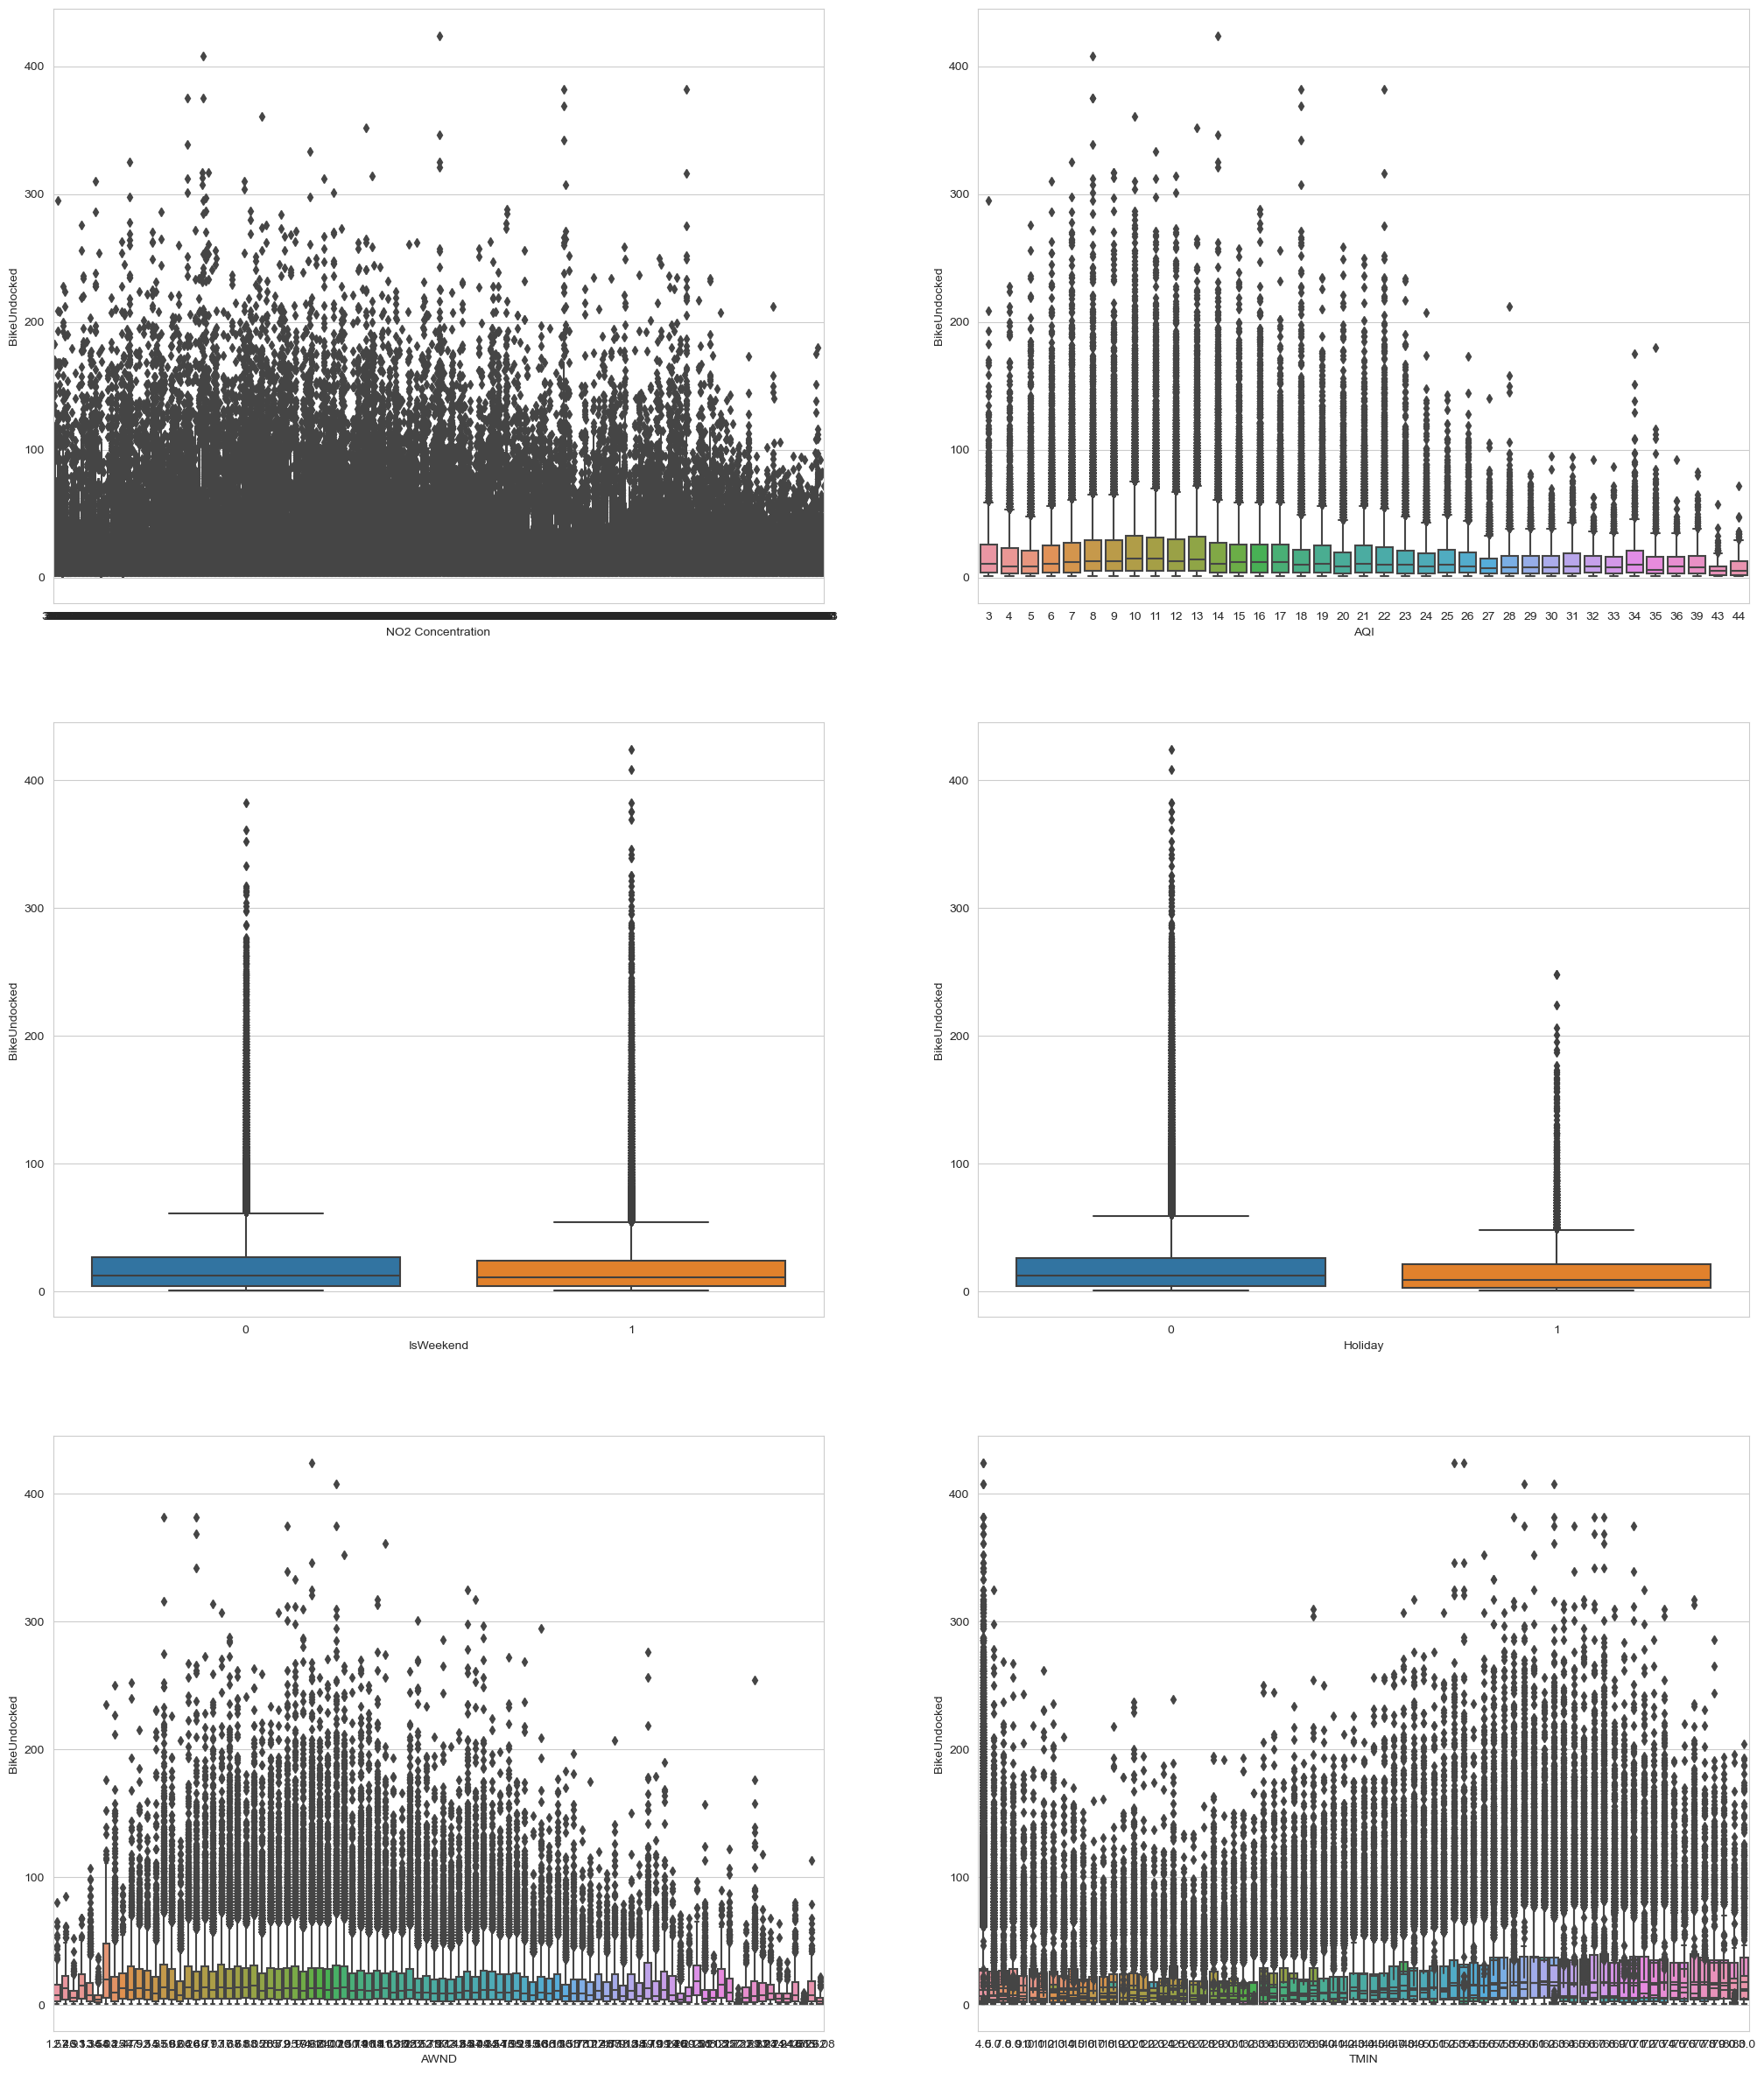

In [39]:
# Build boxplot of all categorical variables againt the target variable(BikeUndocked) 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 30))
plt.subplot(3,2,1)
sns.boxplot(x = 'NO2 Concentration', y ='BikeUndocked' , data = df_trip_group)
plt.subplot(3,2,2)
sns.boxplot(x = 'AQI', y = 'BikeUndocked', data = df_trip_group)
plt.subplot(3,2,3)
sns.boxplot(x = 'IsWeekend', y = 'BikeUndocked', data = df_trip_group)
plt.subplot(3,2,4)
sns.boxplot(x = 'Holiday', y = 'BikeUndocked', data = df_trip_group)
plt.subplot(3,2,5)
sns.boxplot(x = 'AWND', y = 'BikeUndocked', data = df_trip_group)
plt.subplot(3,2,6)
sns.boxplot(x = 'PRCP', y = 'BikeUndocked', data = df_trip_group)
plt.subplot(3,2,6)
sns.boxplot(x = 'SNOW', y = 'BikeUndocked', data = df_trip_group)
plt.subplot(3,2,6)
sns.boxplot(x = 'TMAX', y = 'BikeUndocked', data = df_trip_group)
plt.subplot(3,2,6)
sns.boxplot(x = 'TMIN', y = 'BikeUndocked', data = df_trip_group)

plt


##### Pairplot to check the relationships between numeric variables variables

<module 'matplotlib.pyplot' from 'D:\\Softwares\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

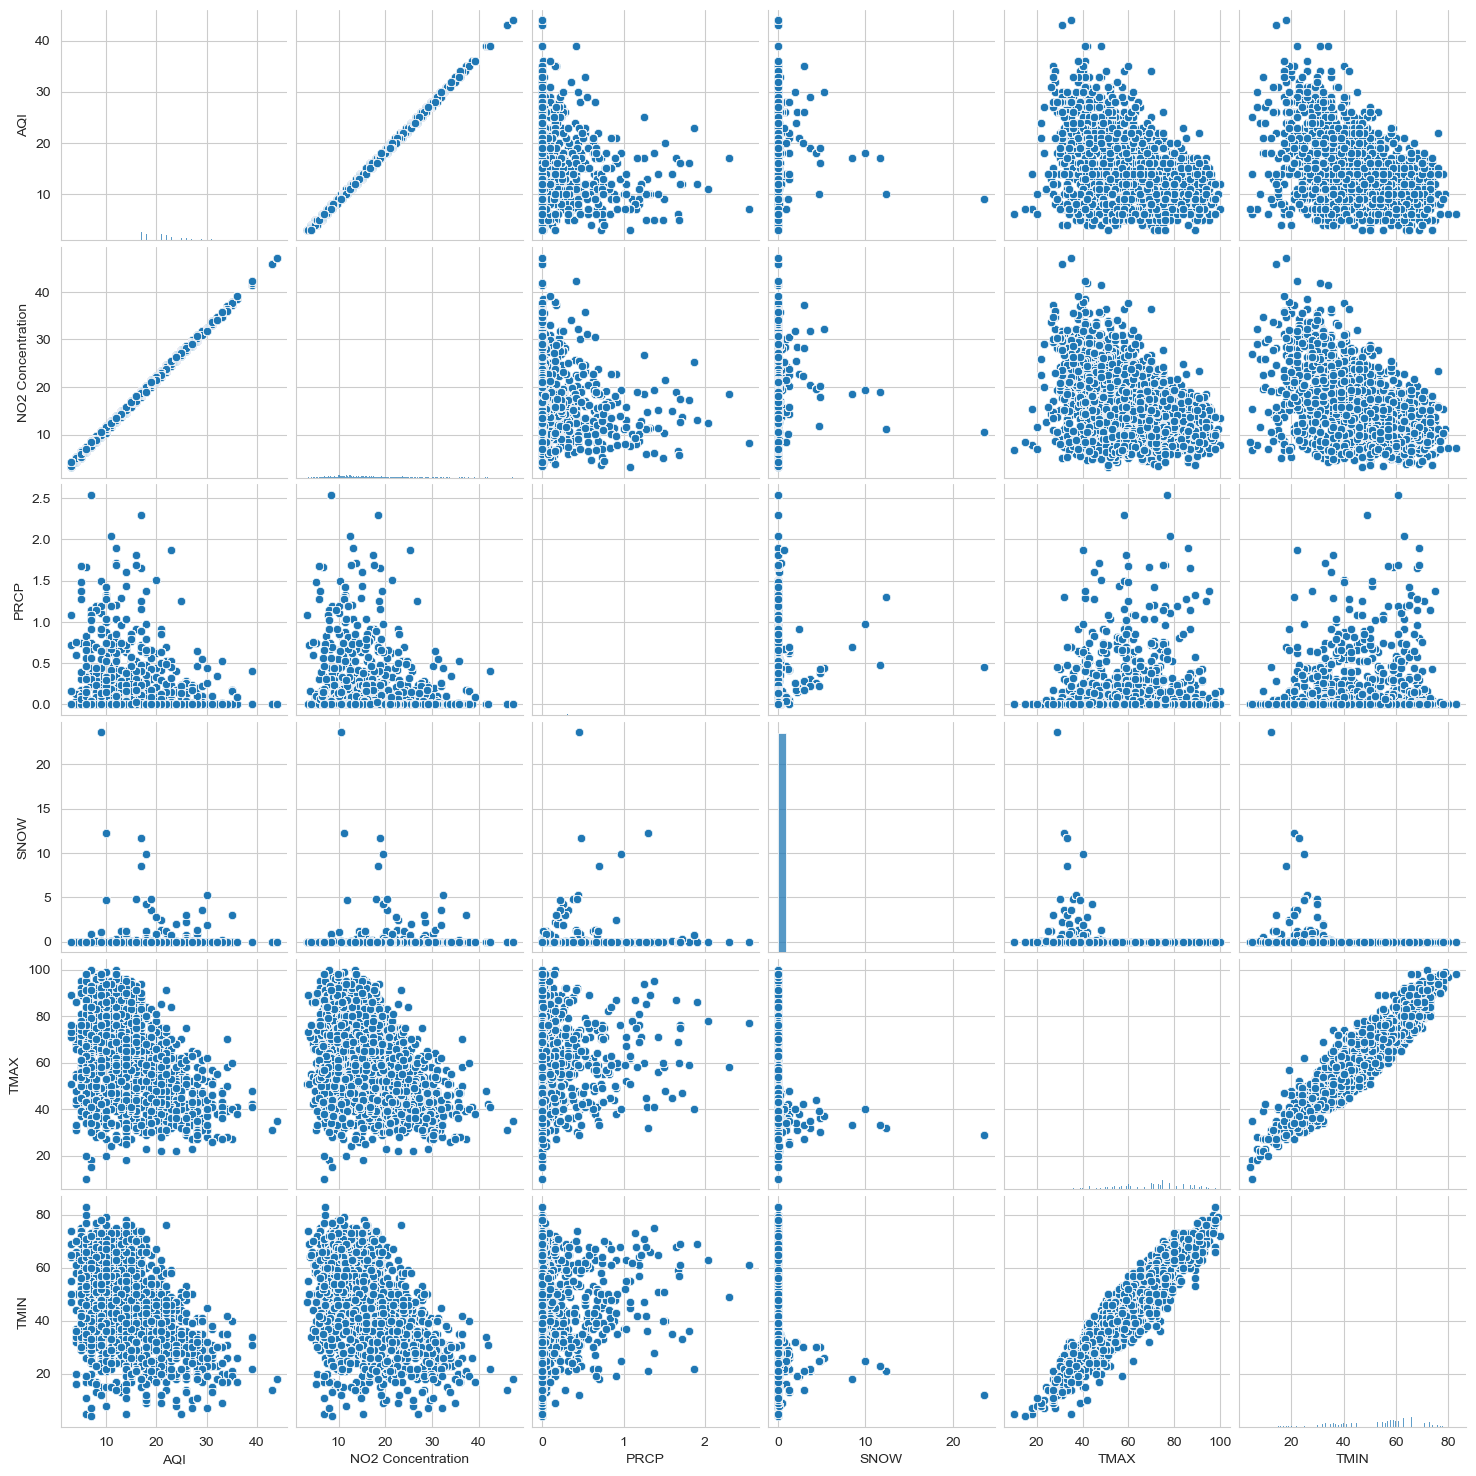

In [40]:
bike_num = df_trip[['AQI','NO2 Concentration','PRCP','SNOW','TMAX','TMIN']]
sns.pairplot(bike_num)
plt

## Correlation Matrix

In [41]:
df_trip_group.corr()


,BikeUndocked,NO2 Concentration,AQI,IsWeekend,Holiday,DailyCases,AWND,PRCP,SNOW,TMAX,TMIN,Year,Month
BikeUndocked,1.000000,-0.096168,-0.095614,-0.015204,-0.024417,-0.053870,-0.085044,-0.069693,-0.050106,0.245386,0.246829,0.141055,0.122417
NO2 Concentration,-0.096168,1.000000,0.998889,-0.220721,-0.030968,0.098538,-0.417930,-0.079134,0.047522,-0.431486,-0.483529,-0.059469,-0.133593
AQI,-0.095614,0.998889,1.000000,-0.222314,-0.031006,0.097539,-0.418390,-0.077944,0.045858,-0.429588,-0.481155,-0.059609,-0.133823
IsWeekend,-0.015204,-0.220721,-0.222314,1.000000,-0.105753,-0.143145,0.008230,-0.035380,0.008734,0.011076,-0.001153,-0.000906,-0.001688
Holiday,-0.024417,-0.030968,-0.031006,-0.105753,1.000000,-0.018960,-0.041489,0.001481,-0.002632,-0.018037,-0.016233,0.008680,0.030904
DailyCases,-0.053870,0.098538,0.097539,-0.143145,-0.018960,1.000000,0.049863,-0.025013,0.058992,-0.201238,-0.216486,0.242774,-0.105938
AWND,-0.085044,-0.417930,-0.418390,0.008230,-0.041489,0.049863,1.000000,0.152031,0.078229,-0.171896,-0.226489,-0.003812,-0.098784
PRCP,-0.069693,-0.079134,-0.077944,-0.035380,0.001481,-0.025013,0.152031,1.000000,0.109084,0.002315,0.049356,-0.041456,0.031416
SNOW,-0.050106,0.047522,0.045858,0.008734,-0.002632,0.058992,0.078229,0.109084,1.000000,-0.143235,-0.142033,0.010785,-0.082111
TMAX,0.245386,-0.431486,-0.429588,0.011076,-0.018037,-0.201238,-0.171896,0.002315,-0.143235,1.000000,0.942593,0.023941,0.230700


<module 'matplotlib.pyplot' from 'D:\\Softwares\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

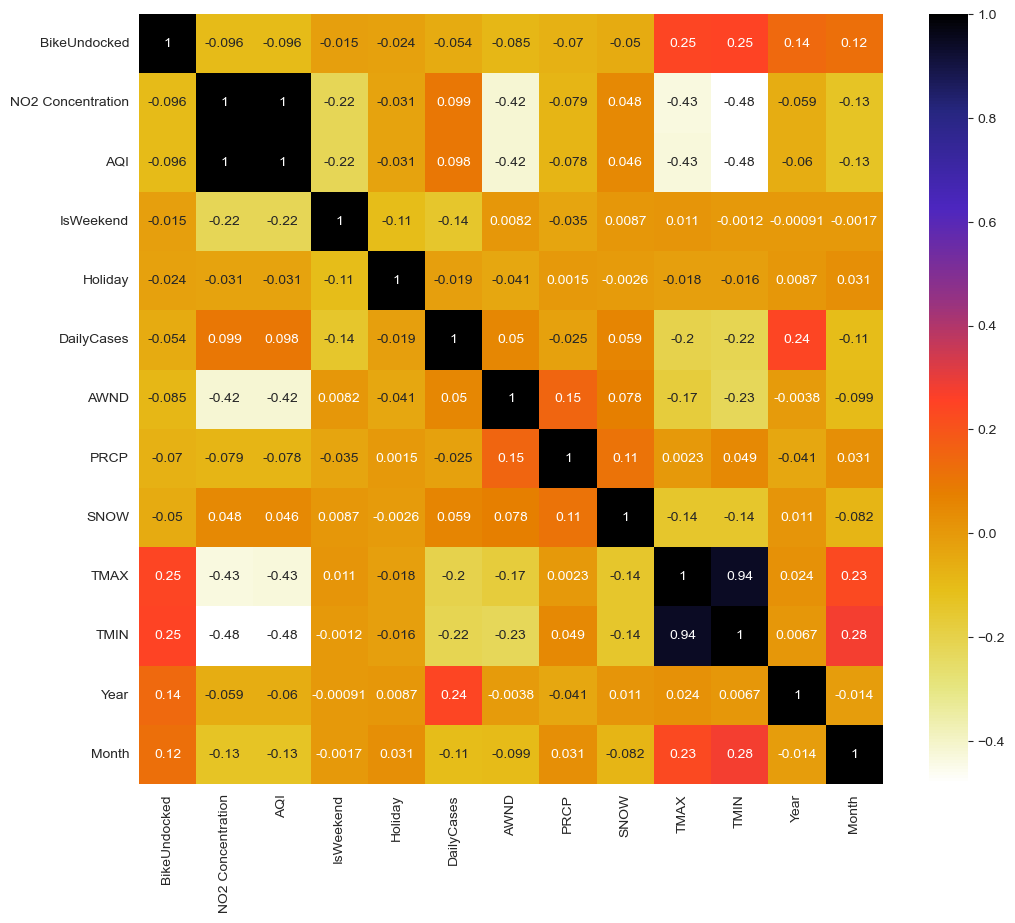

In [42]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_trip_group.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

# Saving Matrix as png
plt.savefig('C:/Users/nitan/OneDrive/Desktop/NEU/2nd/Data Science/Final Project/CorrelationMatrix.png', dpi=300)

plt

In [43]:
# Dropping No2 Concentraion Column
df_trip_group.drop('NO2 Concentration',axis=1,inplace=True)

## Splitting Train&Test Data

##### Splitting Trip Data for Training

In [44]:
# Load the dataset
data = df_trip_group

# Convert the "Date" column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

# Resample the data weekly and sum the values for each feature
weekly_data = data.resample('W').sum()

# Define the features and target variable
X = weekly_data.drop('BikeUndocked', axis=1)
y = weekly_data['BikeUndocked']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Making 2022 Test Data 

In [45]:
df_test2022 = df_trip_group[(df_trip_group['Date'] >= "2022-01-01")]
df_test2022 = df_test2022.groupby(pd.Grouper(key='Date', freq='W')).sum()

X_test2022 = df_test2022.drop('BikeUndocked', axis=1)
y_test2022 = df_test2022['BikeUndocked']

y_test2022new = y_test2022
y_test2022new = y_test2022new.reset_index()
y_test2022new = y_test2022new.drop('Date',axis=1) 

## Linear Regression

##### HyperParamter Tuning for Linear Regression

In [46]:
# Defining pipeline with standard scaling and linear regression
pipe_lr = Pipeline([('scl', StandardScaler()), ('reg', LinearRegression())])

# Defining grid search parameters
param_grid_lr = {'reg__normalize': [True, False]}

# Performing grid search with cross-validation
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

# Printing best parameters
print("Best parameters: {}".format(grid_lr.best_params_))

D:\Softwares\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Best parameters: {'reg__normalize': True}


D:\Softwares\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
D:\Softwares\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = mak

##### Applying Linear Regression

In [47]:
# Create a pipeline with a standard scaler to normalize the data and linear regression
model_linear = make_pipeline(StandardScaler(), LinearRegression())

# Training the model
model_linear.fit(X_train, y_train)

# Making predictions
y_pred = model_linear.predict(X_test)

# Evaluating the performance
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.8179221275893759


###### Testing Model on 2022 Data

In [48]:
# Make predictions
y_pred_linear = model_linear.predict(X_test2022)

# Evaluating the performance
r2_linear = r2_score(y_test2022, y_pred_linear)
print("Prediction Accuracy:", f'{round(r2_linear * 100,2)} %')

Prediction Accuracy: 81.41 %


##### Vizualizing the Prediction

<module 'matplotlib.pyplot' from 'D:\\Softwares\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

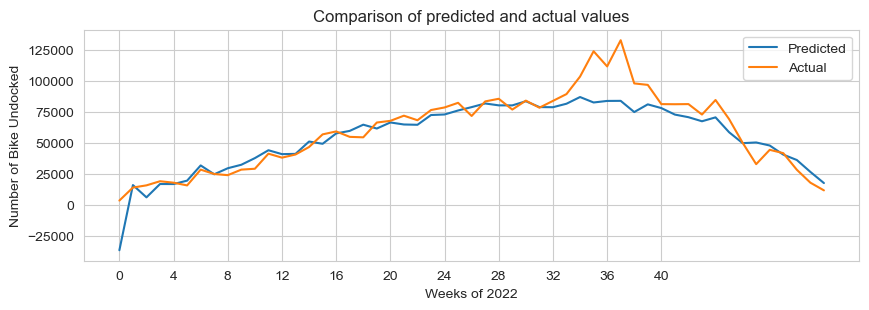

In [49]:
##############Line Chart##############
# Creating a figure and axis object
fig, ax = plt.subplots(figsize=(10, 3))

# plot the predicted values as a line chart
ax.plot(y_pred_linear, label='Predicted')

# plot the actual values as a line chart
ax.plot(y_test2022new, label='Actual')

# seting the labels for x and y axis
ax.set_xlabel('Weeks of 2022')
ax.set_ylabel('Number of Bike Undocked')

# Adding title of the chart
ax.set_title('Comparison of predicted and actual values')

# set x-axis values
ax.set_xticks(range(0, len(y_pred), 4))

# add a legend to the chart
ax.legend()

# Saving LineChart as png
plt.savefig('C:/Users/nitan/OneDrive/Desktop/NEU/2nd/Data Science/Final Project/LinearRegressionPlot.png', dpi=300)

# displaying the chart
plt


<module 'matplotlib.pyplot' from 'D:\\Softwares\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

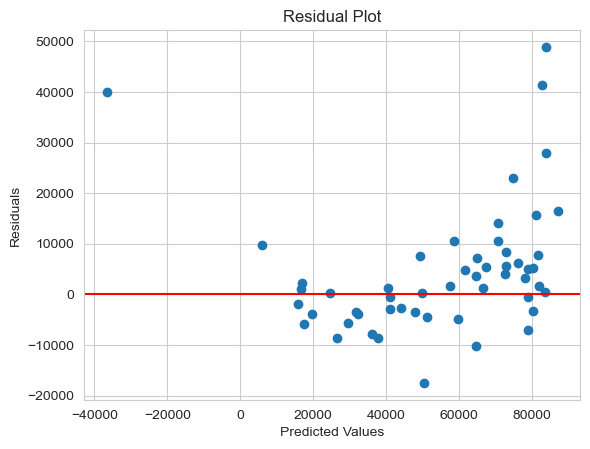

In [50]:
######Residual Chart############

residuals = y_test2022 - y_pred_linear

plt.scatter(y_pred_linear, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')

# Saving ResidualChart as png
plt.savefig('C:/Users/nitan/OneDrive/Desktop/NEU/2nd/Data Science/Final Project/LinearRegressionResidualPlot.png', dpi=300)

plt

## Decision Tree

#### Hyperparameter Tuning for Decision Tree

In [51]:
# Creating decision tree object
dt_reg = DecisionTreeRegressor()

# Set up parameter grid
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6]}

# Creating grid search object
grid_search_dt = GridSearchCV(dt_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fiting grid search object to the data
grid_search_dt.fit(X_train, y_train)

# Print best parameters
print('Best parameters for decision tree:', grid_search_dt.best_params_)

Best parameters for decision tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15}


#### Applying Decision Tree Regression without Hyperparamteres

In [52]:
# Creating a decision tree regression model
model_tree = DecisionTreeRegressor(random_state=42)

# Training the model
model_tree.fit(X_train, y_train)

# Making predictions
y_pred = model_tree.predict(X_test)

# Evaluating the performance
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.866151355680432


#### Applying Decision Tree Regression with Hyperparamteres

In [53]:
# Instantiating the model with hyperparameters
model_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=10)

# Fiting the model
model_tree.fit(X_train, y_train)

# Making Predictions
y_pred = model_tree.predict(X_test)

# Evaluating the model 
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.9211403463932677


#### Testing model on 2022 Data

In [54]:
# Make predictions
y_pred_decision_tree = model_tree.predict(X_test2022)

# Evaluating performance of the model
r2_decision_tree = r2_score(y_test2022, y_pred_decision_tree)

print("Prediction Accuracy:", f'{round(r2_decision_tree * 100,2)} %')

Prediction Accuracy: 96.62 %


##### Vizualizing the Prediction

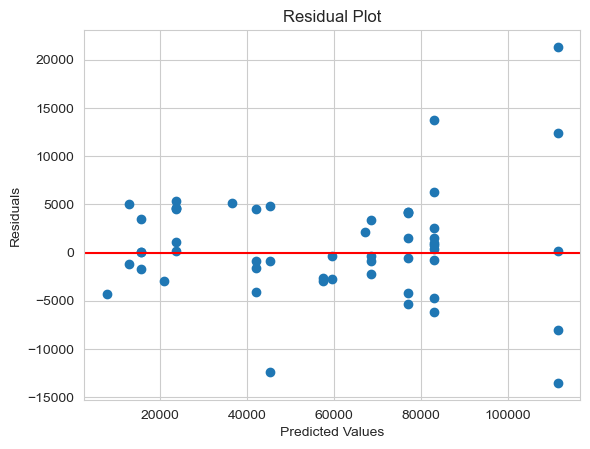

In [55]:
######Residual Chart############
residuals = y_test2022 - y_pred_decision_tree

plt.scatter(y_pred_decision_tree, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

<module 'matplotlib.pyplot' from 'D:\\Softwares\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

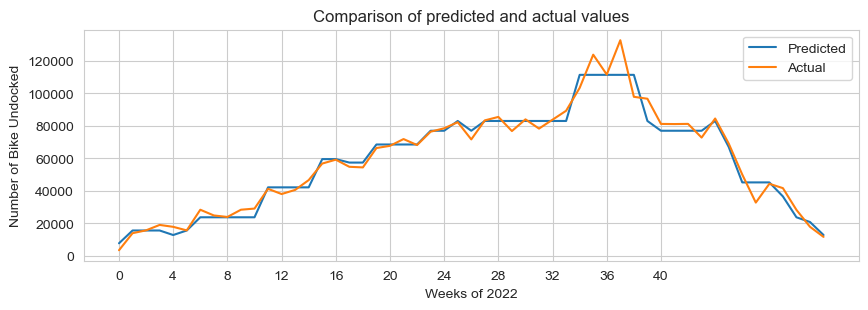

In [56]:
###########Line Chart#############
# creating figure and axis object
fig, ax = plt.subplots(figsize=(10, 3))

# plot the predicted values as a line chart
ax.plot(y_pred_decision_tree, label='Predicted')

# plot the actual values as a line chart
ax.plot(y_test2022new, label='Actual')

# set the labels for x and y axis
ax.set_xlabel('Weeks of 2022')
ax.set_ylabel('Number of Bike Undocked')

# seting the title
ax.set_title('Comparison of predicted and actual values')

# set x-axis values
ax.set_xticks(range(0, len(y_pred), 4))

# add a legend to the chart
ax.legend()

# Saving LineChart as png
plt.savefig('C:/Users/nitan/OneDrive/Desktop/NEU/2nd/Data Science/Final Project/DecisionTreePlot.png', dpi=600)

# display 
plt

## Random Forest Regression

#### Hyperparameter tuning for Random Forest

In [57]:
# Creating random forest object
rf_reg = RandomForestRegressor()

# Set up parameter grid
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6]}

# Creating grid search object
grid_search_rf = GridSearchCV(rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fiting grid search object to the data
grid_search_rf.fit(X_train, y_train)

# Printing best parameters
print('Best parameters for random forest:', grid_search_rf.best_params_)

Best parameters for random forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


##### Applying Random Forest without Hyperparameters

In [58]:
# Create a random forest regression model
model_random = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model_random.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model_random.predict(X_test)

# Evaluate the performance of the model
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.9440673855587828


##### Applying Random Forest with Hyperparamteres 

In [59]:
# Create a random forest regression model
model_random = RandomForestRegressor(max_depth= 10, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 50)

# Train the model on the training data
model_random.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model_random.predict(X_test)

# Evaluate the performance of the model
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.9392022872011431


##### Testing model on 2022 Data

In [60]:
# Make predictions on the testing data
y_pred_random_forest = model_random.predict(X_test2022)

# Evaluate the performance of the model
r2_random_forest = r2_score(y_test2022, y_pred_random_forest)

print("Prediction Accuracy:", f'{round(r2_random_forest * 100,2)} %')

Prediction Accuracy: 97.35 %


##### Vizualizing the Prediction

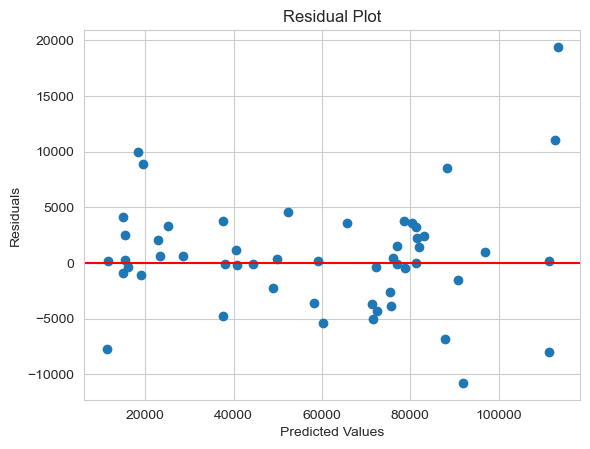

In [61]:
######Residual Chart############
residuals = y_test2022 - y_pred_random_forest

plt.scatter(y_pred_random_forest, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

<module 'matplotlib.pyplot' from 'D:\\Softwares\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

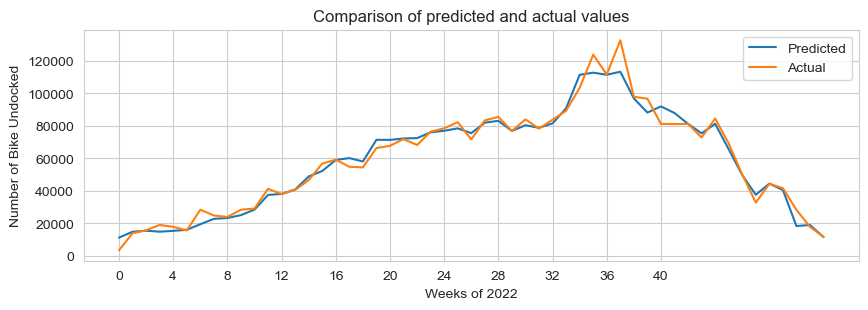

In [62]:
###########Line Chart##########3333333
# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 3))

# plot the predicted values as a line chart
ax.plot(y_pred_random_forest, label='Predicted')

# plot the actual values as a line chart
ax.plot(y_test2022new, label='Actual')

# set the labels for x-axis and y-axis
ax.set_xlabel('Weeks of 2022')
ax.set_ylabel('Number of Bike Undocked')

# set the title of the chart
ax.set_title('Comparison of predicted and actual values')

# set x-axis values
ax.set_xticks(range(0, len(y_pred), 4))

# add a legend to the chart
ax.legend()

# Saving LineChart as png
plt.savefig('C:/Users/nitan/OneDrive/Desktop/NEU/2nd/Data Science/Final Project/RandomForest.png', dpi=600)

# display the chart
plt

### Comparing Model Prediction Accuracy

In [63]:
model_compare = {'Model Name':['Linear Regression', 'Decision Tree', 'Random Forest'],
        'Prediction Accuracy':[r2_linear, r2_decision_tree, r2_random_forest]}

<module 'matplotlib.pyplot' from 'D:\\Softwares\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

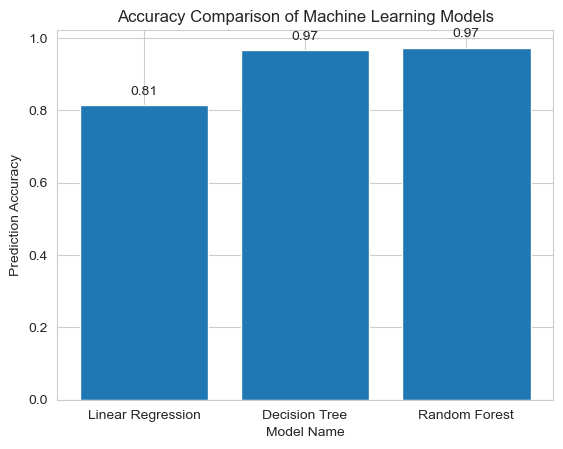

In [64]:
# Define the data from the model_compare dictionary
model_names = model_compare['Model Name']
accuracy_scores = model_compare['Prediction Accuracy']

# Set up the plot
fig, ax = plt.subplots()

# Creating a bar chart
ax.bar(model_names, accuracy_scores)

# labels
ax.set_title('Accuracy Comparison of Machine Learning Models')
ax.set_xlabel('Model Name')
ax.set_ylabel('Prediction Accuracy')

# Display Accuracy Score on top of each bar
for i in ax.patches:
    ax.annotate(str(round(i.get_height(), 2)), (i.get_x() + i.get_width() / 2., i.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Saving BarChart as png
plt.savefig('C:/Users/nitan/OneDrive/Desktop/NEU/2nd/Data Science/Final Project/ModelPrediction.png', dpi=600)
    
# Displaying the plot
plt